In [1]:
# insert rickroll here ayyye

In [2]:
import csv
import os
import requests
import pandas as pd
import tabula.io
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from statistics import mean

Part 1: Data collection/curation + parsing

We have decided to use two sets of data for this project, each involving many countries around the world: gun ownership,
and a collection of homicide rates. The number of guns possessed by civilians in each country cannot stand alone as an indicator of gun violence, as people
kill other people--guns do not.

The gun ownership data originated from smallarmssurvey.org, an organization that
maintains databases on small arms-related statistics worldwide: violent deaths, firearms holdings, etc. We felt that the
data, given the organization's focus on impartial analysis, would be thorough and well-researched.

The homicide rate data originated from the United Nations Office on Drugs and Crime. We shouldn't need to expand on their
reputation, but the data appears to be extremely thorough.

NOTE: should we look for suicide by gun rates, too? What about population?

In [3]:
# opening the homicide rate file
#NOTE: not sure how to scrape this one off the internet, so downloaded data manually and stuck inside the project
homicide_rates = pd.read_csv('united_nations_homicide_rate_by_mechanisms.csv')

#opening the gun ownership data
url = "http://www.smallarmssurvey.org/fileadmin/docs/Weapons_and_Markets/Tools/Firearms_holdings/SAS-BP-Civilian-held-firearms-annexe.pdf"
got_gun = tabula.io.read_pdf(url, output_format='dataframe', pages='all')

#rename columns
got_gun[0].columns=['country_code', 'country', 'region', 'subregion', 'population', 'total_est_guns', 'est_of_guns_per_100_ppl', 'delete1', 'comp_method', 'registered_guns', 'delete2', 'unregistered_guns']

#drop some unnecessary columns & rows
got_gun[0].drop(range(0,5), inplace=True)
#NOTE: should we delete some other columns? is all of these data relevant for our project?
got_gun[0].drop(columns=['delete1', 'delete2'], inplace=True)

got_gun[0]

,country_code,country,region,subregion,population,total_est_guns,est_of_guns_per_100_ppl,comp_method,registered_guns,unregistered_guns
5,AFG,Afghanistan,Asia,Southern Asia,"34,169,000","4,270,000",12.5,2.0,NaN,NaN
6,ALB,Albania,Europe,Southern Europe,"2,911,000","350,000",12.0,2.0,"65,747","284,253"
7,DZA,Algeria,Africa,Northern Africa,"41,064,000","877,000",2.1,2.0,"200,000","677,000"
8,ASM,American Samoa,Oceania,Polynesia,"56,000",400,0.7,2.0,250,150
9,AND,Andorra,Europe,Southern Europe,"69,000","10,000",14.1,3.0,"7,599","2,401"
...,...,...,...,...,...,...,...,...,...,...
266,VGB,Virgin Islands (U.K.),Americas,Caribbean,"31,000",300,0.8,2.0,48,252
267,VIR,Virgin Islands (U.S.),Americas,Caribbean,"107,000","18,000",16.6,2.0,NaN,NaN
268,YEM,Yemen,Asia,Western Asia,"28,120,000","14,859,000",52.8,2.0,NaN,NaN
269,ZMB,Zambia,Africa,Eastern Africa,"17,238,000","158,000",0.9,2.0,"86,642","71,358"


In [4]:
homicide_rates

,Country,Indicator,Region,Subregion,Unit,Year,Clear,Female Firearm chart,Female Firearms,Female Other,...,Male Other,Male Other chart,Male Sharp,Male Sharp chart,Male Unknown,Male Unknown chart,Number of Records,Onlyrates,rate,Round rate and count
0,India,homicide by Firearms,Asia,Southern Asia,Count,1999,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"9,294","9,294"
1,India,Firearms rate,Asia,Southern Asia,Rate,1999,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.9,0.9
2,India,homicide by Firearms,Asia,Southern Asia,Count,2000,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"8,370","8,370"
3,India,Firearms rate,Asia,Southern Asia,Rate,2000,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.8,0.8
4,India,homicide by Firearms,Asia,Southern Asia,Count,2001,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"8,019","8,019"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17603,Australia,Male Homicide by Unknown Mechanisms,Oceania,Australia and New Zealand,Count,2017,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,4,4
17604,Australia,Male Homicide rate by Other Mechanisms,Oceania,Australia and New Zealand,Rate,2017,0,NaN,NaN,NaN,...,0.5,NaN,NaN,NaN,NaN,NaN,1,NaN,0.5,0.5
17605,Australia,Male Homicide rate by Unknown Mechanisms,Oceania,Australia and New Zealand,Rate,2017,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,1,NaN,0,0
17606,Australia,Other Mechanism rate,Oceania,Australia and New Zealand,Rate,2017,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.3,0.3


Part 2: Data management/representation

In [24]:
regions = homicide_rates['Region'].unique()
rows = []
for row in got_gun[0].iterrows():
    if row[1]['region'] in regions and row[1]['total_est_guns'] != '-':
        rows.append(row[1])
gun_owners = pd.DataFrame(rows)
gun_owners

,country_code,country,region,subregion,population,total_est_guns,est_of_guns_per_100_ppl,comp_method,registered_guns,unregistered_guns
5,AFG,Afghanistan,Asia,Southern Asia,"34,169,000","4,270,000",12.5,2.0,NaN,NaN
6,ALB,Albania,Europe,Southern Europe,"2,911,000","350,000",12.0,2.0,"65,747","284,253"
7,DZA,Algeria,Africa,Northern Africa,"41,064,000","877,000",2.1,2.0,"200,000","677,000"
8,ASM,American Samoa,Oceania,Polynesia,"56,000",400,0.7,2.0,250,150
9,AND,Andorra,Europe,Southern Europe,"69,000","10,000",14.1,3.0,"7,599","2,401"
...,...,...,...,...,...,...,...,...,...,...
266,VGB,Virgin Islands (U.K.),Americas,Caribbean,"31,000",300,0.8,2.0,48,252
267,VIR,Virgin Islands (U.S.),Americas,Caribbean,"107,000","18,000",16.6,2.0,NaN,NaN
268,YEM,Yemen,Asia,Western Asia,"28,120,000","14,859,000",52.8,2.0,NaN,NaN
269,ZMB,Zambia,Africa,Eastern Africa,"17,238,000","158,000",0.9,2.0,"86,642","71,358"


In [25]:
gun_owners = gun_owners.drop(['comp_method', 'registered_guns', 'unregistered_guns'], axis=1)
per_100k = []
for row in gun_owners.iterrows():
    val = (float(row[1]['total_est_guns'].replace(",", "")) / float(row[1]['population'].replace(",", ""))) * 100000
    per_100k.append(round(val, 2))
gun_owners['guns_per_100k'] = per_100k
gun_owners

,country_code,country,region,subregion,population,total_est_guns,est_of_guns_per_100_ppl,guns_per_100k
5,AFG,Afghanistan,Asia,Southern Asia,"34,169,000","4,270,000",12.5,12496.71
6,ALB,Albania,Europe,Southern Europe,"2,911,000","350,000",12.0,12023.36
7,DZA,Algeria,Africa,Northern Africa,"41,064,000","877,000",2.1,2135.69
8,ASM,American Samoa,Oceania,Polynesia,"56,000",400,0.7,714.29
9,AND,Andorra,Europe,Southern Europe,"69,000","10,000",14.1,14492.75
...,...,...,...,...,...,...,...,...
266,VGB,Virgin Islands (U.K.),Americas,Caribbean,"31,000",300,0.8,967.74
267,VIR,Virgin Islands (U.S.),Americas,Caribbean,"107,000","18,000",16.6,16822.43
268,YEM,Yemen,Asia,Western Asia,"28,120,000","14,859,000",52.8,52841.39
269,ZMB,Zambia,Africa,Eastern Africa,"17,238,000","158,000",0.9,916.58


In [27]:
guns_per_region = {}
for reg in gun_owners['region'].unique():
    guns_per_region[reg] = pd.DataFrame(gun_owners.loc[gun_owners['region'] == reg])

In [28]:
years = {}
for y in homicide_rates['Year'].unique():
    rates = []
    data = homicide_rates.loc[homicide_rates['Year'] == y]
    for row in data.iterrows():
        val = str(row[1]['rate']).replace(",", "")
        val = float(val)
        rates.append(val)
    years[y] = mean(rates)

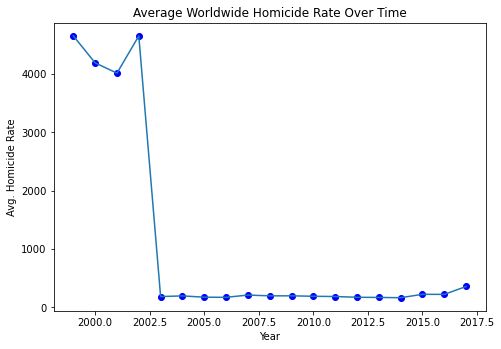

In [29]:
x_year = list(years.keys())
y_val = list(years.values())

fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(x_year, y_val, color="b")
ax.plot(x_year, y_val)

ax.set_xlabel("Year")
ax.set_ylabel("Avg. Homicide Rate")
ax.set_title("Average Worldwide Homicide Rate Over Time")
plt.show()

In [30]:
pop = {}
guns = {}
for key in guns_per_region.keys():
    table = guns_per_region[key]
    total_pop = {}
    total_gun = {}
    for row in table.iterrows():
        total_pop[row[1]['country_code']] = int(row[1]['population'].replace(",", ""))
        total_gun[row[1]['country_code']] = float(row[1]['total_est_guns'].replace(",", ""))
    pop[key] = total_pop
    guns[key] = total_gun

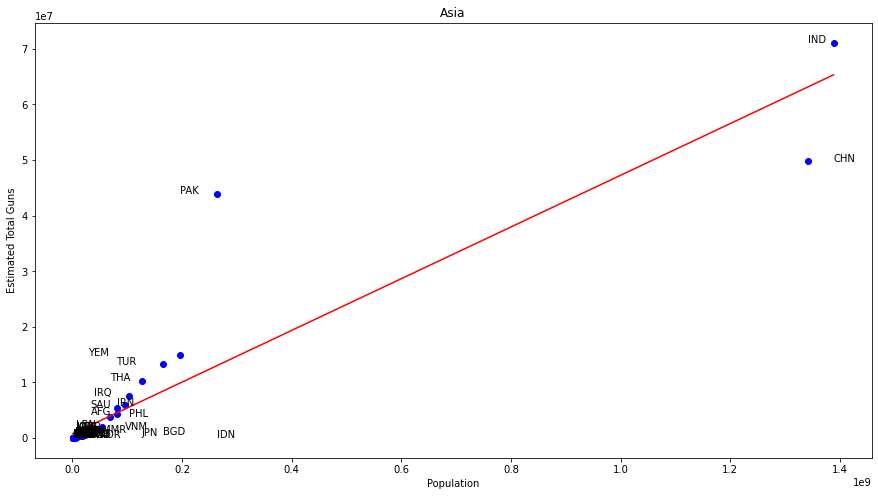

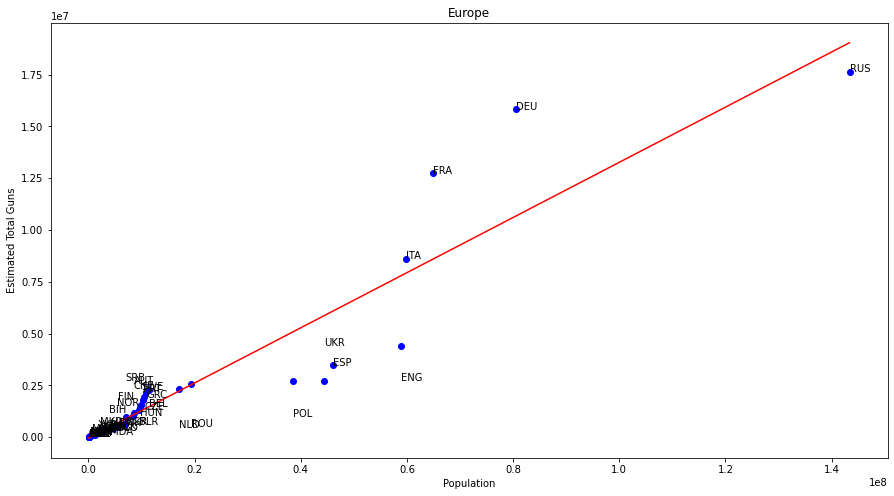

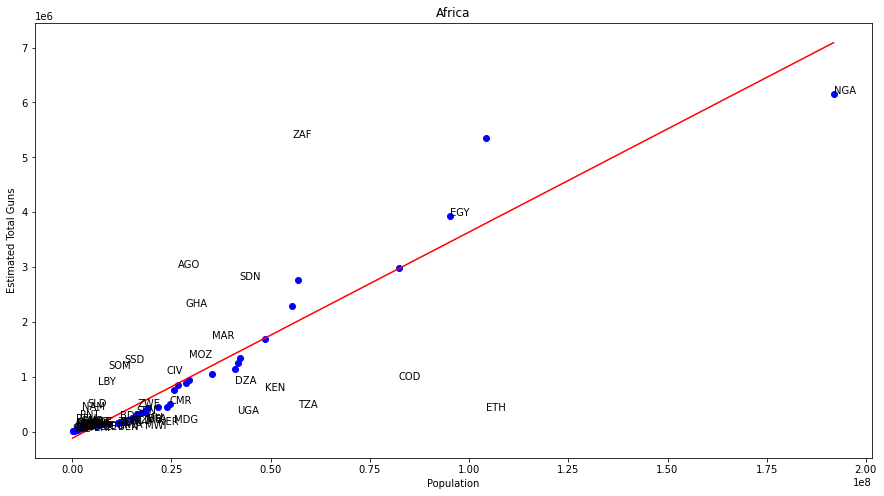

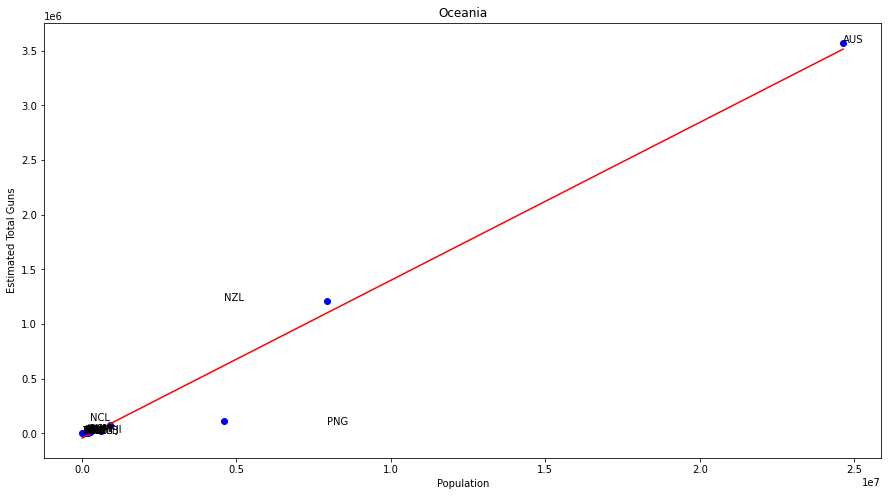

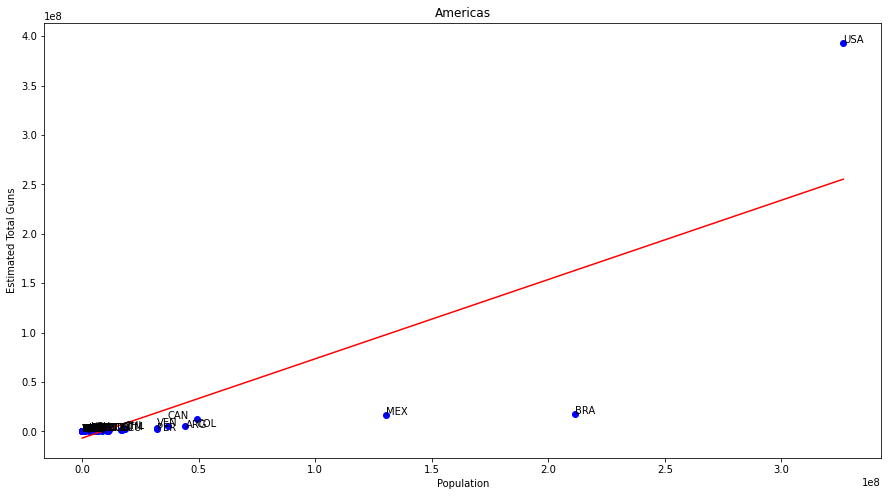

In [31]:
titles = list(guns_per_region.keys())
for i in titles:
    x = np.sort(np.array(list(pop[i].values())))
    y = np.sort(np.array(list(guns[i].values())))
    m, b = np.polyfit(x,y,1)

    plt.figure(figsize=(15, 8))
    plt.scatter(x, y, color="Blue")
    plt.plot(x, (m*x) + b, color="Red")

    plt.xlabel("Population")
    plt.ylabel("Estimated Total Guns")
    plt.title(i)

    for j in pop[i].keys():
        plt.text(x=pop[i][j], y=guns[i][j], s=j)
    plt.show()

In [79]:
guns = {}
guns_per = {}
for key in guns_per_region.keys():
    table = guns_per_region[key]
    total_pop = {}
    total_gun = {}
    for row in table.iterrows():
        total_pop[row[1]['country_code']] = int(row[1]['total_est_guns'].replace(",", ""))
        total_gun[row[1]['country_code']] = row[1]['guns_per_100k']
    pop[key] = total_pop
    guns[key] = total_gun

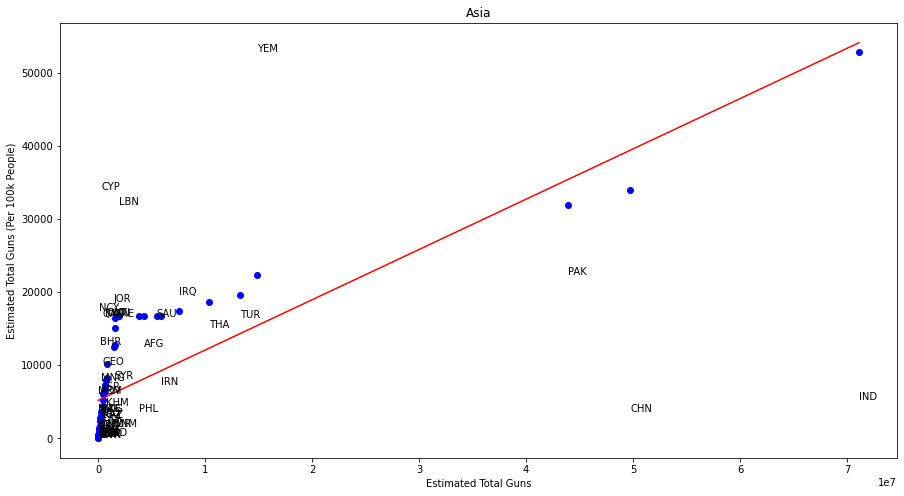

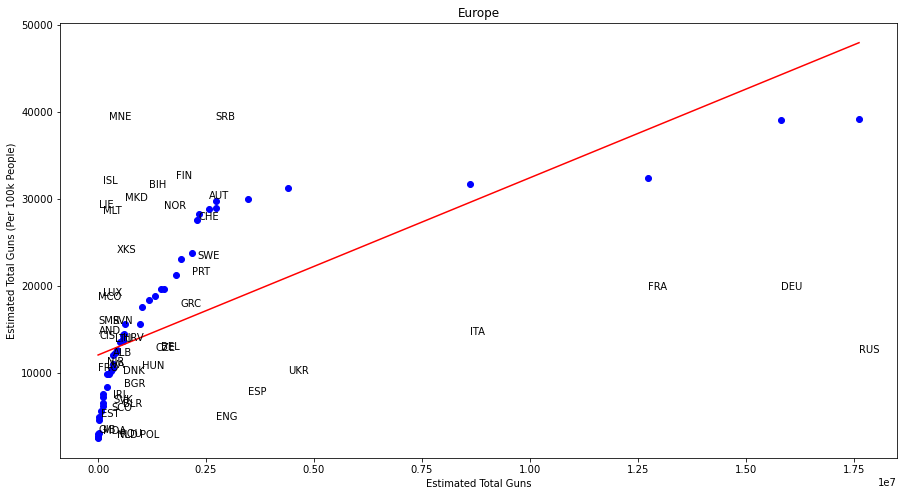

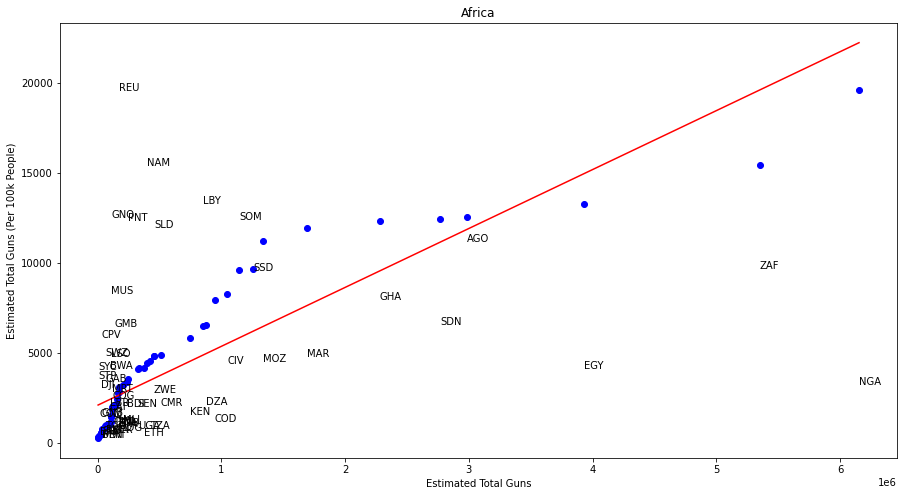

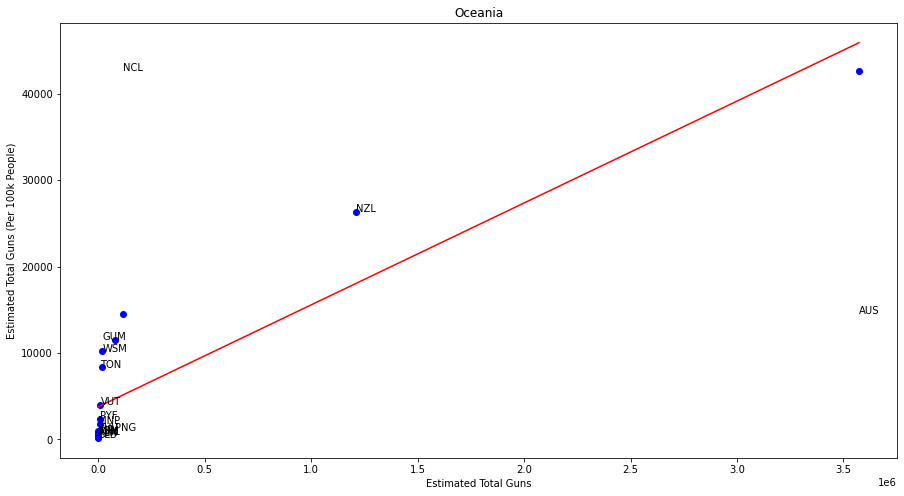

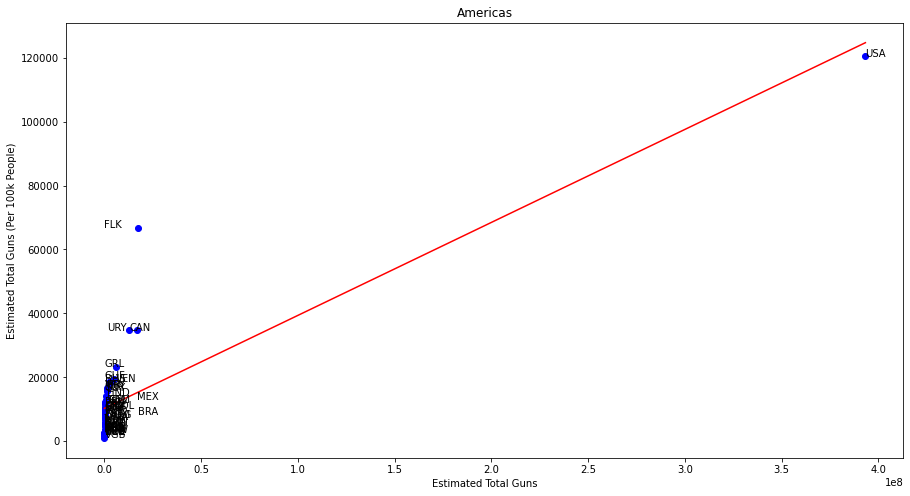

In [81]:
titles = list(guns_per_region.keys())
for i in titles:
    x = np.sort(np.array(list(pop[i].values())))
    y = np.sort(np.array(list(guns[i].values())))
    m, b = np.polyfit(x,y,1)

    plt.figure(figsize=(15, 8))
    plt.scatter(x, y, color="Blue")
    plt.plot(x, (m*x) + b, color="Red")

    plt.xlabel("Estimated Total Guns")
    plt.ylabel("Estimated Total Guns (Per 100k People)")
    plt.title(i)

    for j in pop[i].keys():
        plt.text(x=pop[i][j], y=guns[i][j], s=j)
    plt.show()

In [ ]:
# TODO -- Found this link: https://www.indexmundi.com/facts/indicators/VC.IHR.PSRC.P5/rankings/middle-east -- has different links to more tables per region but would need to do a couple of different scrapes per region due to how the site is divied up, or could just do the one tab for the whole world (Look at bottom of table and the links to the other tables are just below it). Next on my to do list

In [99]:
# This is just the table of every country in the world, not organized by region

r = requests.get('https://www.indexmundi.com/facts/indicators/VC.IHR.PSRC.P5/rankings')
homs = pd.read_html(r.text)[0].drop(['Rank'], axis=1)
homs.loc[homs['Year'] == 2017]

,Country,Value,Year
0,El Salvador,61.8,2017
1,Jamaica,57.0,2017
3,Honduras,41.7,2017
5,Belize,37.9,2017
7,South Africa,35.9,2017
...,...,...,...
161,"Hong Kong SAR, China",0.3,2017
162,"Macao SAR, China",0.3,2017
163,Luxembourg,0.3,2017
164,Singapore,0.2,2017


In [ ]:
# Thinking of using this data to make a graph that shows, for each of the highest gun-per-people countries, how much correlation that guns-per-people as on intentional homicides per people

In [11]:
# TODO -- Left off here (mrp)

Part 3: Exploratory data analysis

In [12]:
#stuff

Part 4: Hypothesis testing & machine learning

In [13]:
#wat

Part 5: Communication of insights attained

In [14]:
#um